# Heart Attack Predictior
By: Zaine Ancheta

## Background

Description:
A heart attack, or more scientifically known as a myocardial infarction, is when the heart muscles fail due to lack of blood supply because of blood flow restriction or blockage to the heart.

### Dataset Sources

The dataset was created by:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

The dataset is collected from the following sources:
- Cleveland Clinic Foundation (cleveland.data)
- Hungarian Institute of Cardiology, Budapest (hungarian.data)
- V.A. Medical Center, Long Beach, CA (long-beach-va.data)
- University Hospital, Zurich, Switzerland (switzerland.data)

The dataset was obtained through kaggle.com and was created by Nikhil Anand.

### Content and Goals
The dataset contains 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. The goal of this analysis is to accurately predict whether or not a patient has heart disease using the provided attributes. The analysis will also provide insights to help with properly diagnosing a patient with heart disease.



### Column Descriptions

How each column is measured:

- age: Age in years of patient
- sex: Patient gender
- exang: Exercise induced angina (1 = yes; 0 = no)
- ca: # of major vessels (0-3)
- cp: Type of chest pain (types = 1-4)
    - 1 = Typical Angina
    - 2 = Atypical Angina
    - 3 = Non-Anginal Pain
    - 4 = Asymptomatic
- trtbps: Resting blood pressure (mm Hg)
- chol: Cholesterol level (mg/dl)
- fbs: fasting blood sugar > 120 mg/dl  (1 = yes; 0 = no)
- rest_ecg: Resting electrocardiographic results (types = 0-2)
    - 0: Normal
    - 1: ST-T wave abnormality
    - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- thal: Max heart rate achieved
- num: 0 = less likely of heart attack, 1 = more likely of heart attack




### Library Imports

The following libraries will be used for this project:

In [268]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

### Exploratory Data Analysis (EDA)

Reading the dataset and analyzing the data:

In [257]:
df = pd.read_csv("heart_health.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  target    294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [259]:
# (Rows, Columns)
print(df.shape)

# Column Names
print(df.columns)


(294, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [260]:
print(df.isnull().sum())
# Checks for amount of NA values in dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


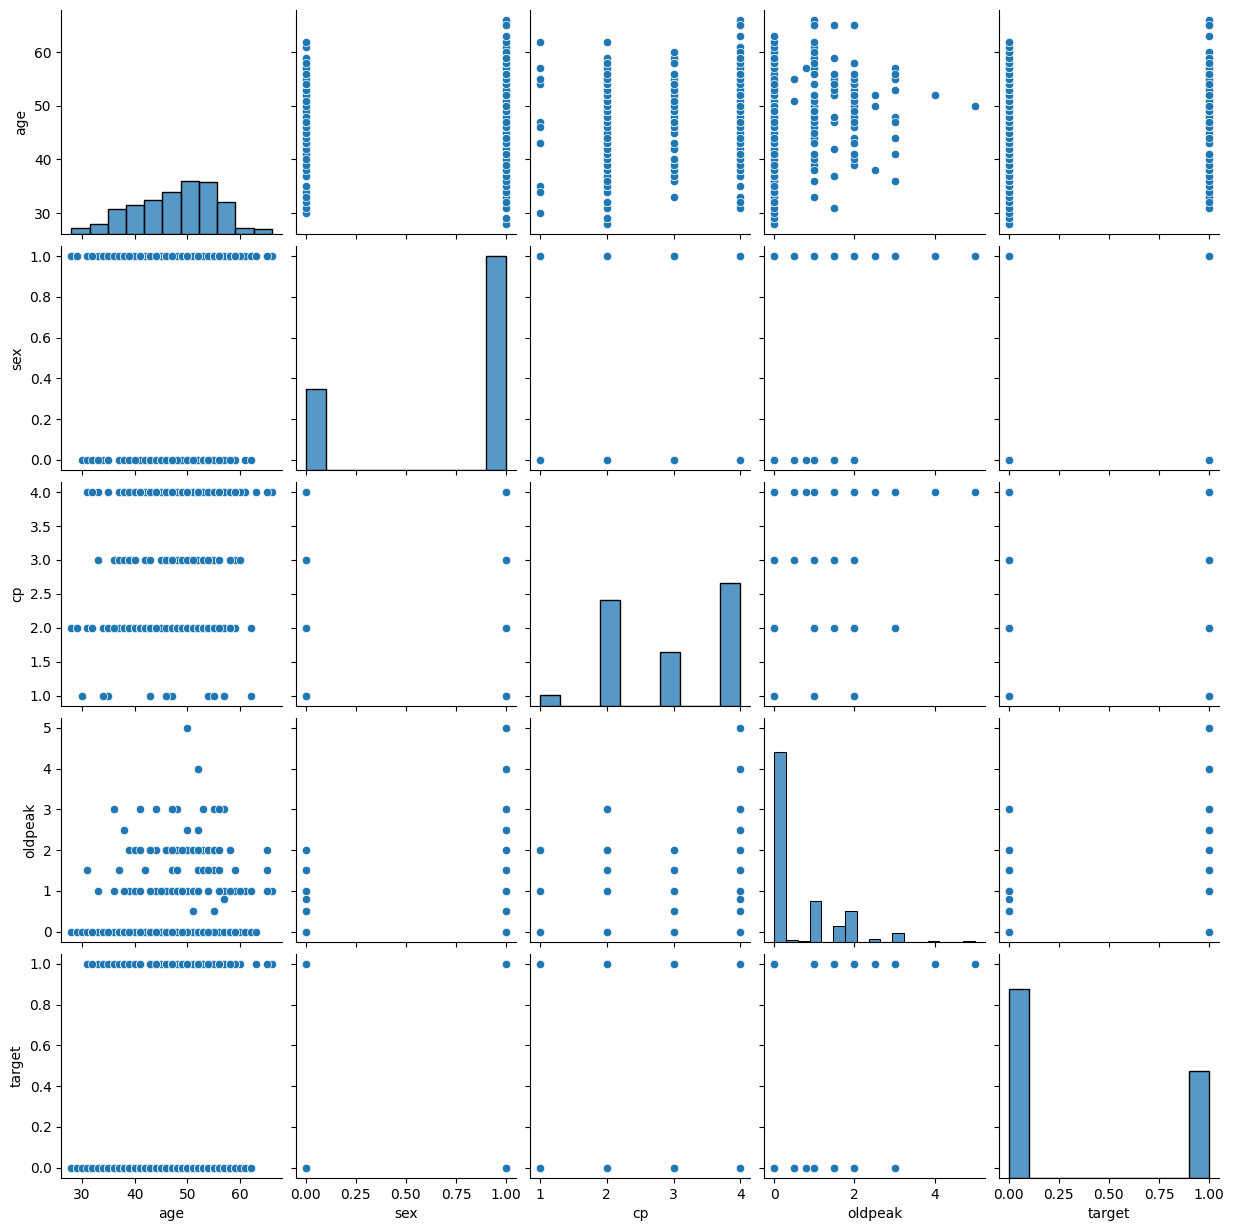

In [261]:
sns.pairplot(df)

### Data Pre-processing

In [262]:
# Replace all '?' with nan
df.replace("?", np.nan, inplace=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# (Rows, Columns)
print(df.shape)

(294, 14)


### Setting Up the Prediction

In [265]:
# Define features used in making the prediction
# I removed features that I believe are unimportant to the prediction.
features = [
    'age',           # Age of the patient
    'cp',            # Chest pain type
    'trestbps',      # Resting blood pressure in mm Hg
    'chol',          # Serum cholesterol in mg/dl
    'thalach',       # Maximum heart rate achieved
    'exang',         # Exercise induced angina (1 = yes, 0 = no)
    'oldpeak',       # ST depression induced by exercise relative to rest
    'slope',         # Slope of the peak exercise ST segment
]

# Assign X and y variables
X = df_imputed[features]
y = df_imputed['target']

# Splitting data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



### Prediction and Evaluation

Accuracy: 0.85
Confusion Matrix:
[[34  4]
 [ 5 16]]


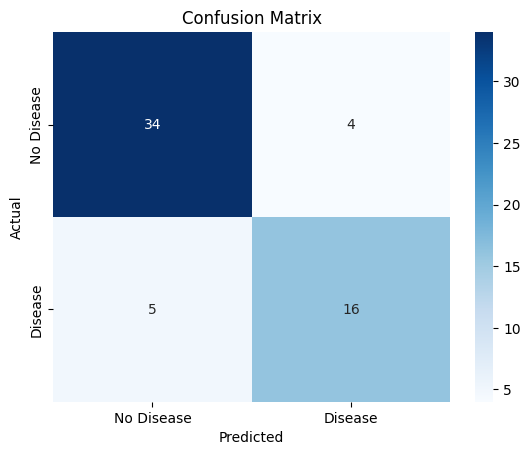

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

#(No Heart Disease Prediction [Correct, Wrong], Heart Disease Predicted [Wrong, Correct])
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()